In [30]:
import csv
import ast

# Load optimal values from the second CSV file (val_opt.csv)
optimal_values = {}  # Dictionary to store optimal values by instance and ID
with open("val_opt.csv", mode="r") as file:
    reader = csv.reader(file)
    gap_names = next(reader)[1:]  # Get instance names, skipping the first empty cell
    
    for row in reader:
        for id,gap in enumerate(gap_names):
            # Parse the dictionary string in each row's column and extract 'val'
            instance_id = (gap, row[0])  # Use (instance, ID) as the key
            optimal_values[instance_id] = ast.literal_eval(row[id+1])['val']  # `i + 1` accesses correct instance column

# Load the results from the first CSV file and perform the analysis
with open("resultats_T/optimal_evaluations.csv", mode="r") as file:
    reader = csv.reader(file)
    header = next(reader)
    
    for row in reader:
        instance_name = row[0]  # Instance name (e.g., gap1)
        run_id = str(int(row[1])-1)  # Run ID as an integer
        # Convert generation values to integers and find the best (last) value
        gen_values = [int(val) for val in row[2:] if val]
        best_value = gen_values[-1] if gen_values else None
        
        # Get the optimal value for the instance and run ID
        optimal_value = optimal_values.get((instance_name, run_id), None)
        #print(instance_name, run_id)
        
        if optimal_value is not None and best_value is not None:
            # Calculate the difference and relative difference
            difference = best_value - optimal_value
            relative_difference = (difference / optimal_value) * 100 if optimal_value != 0 else None
            
            # Print the results
            print(f"Instance: {instance_name}, Run ID: {run_id}")
            print(f"  Optimal Value: {optimal_value}")
            print(f"  Best Value: {best_value}")
            print(f"  Difference: {difference}")
            print(f"  Relative Difference: {relative_difference:.2f}%")
        else:
            print(f"Data missing for Instance: {instance_name}, Run ID: {run_id}")


Instance: gap1, Run ID: 0
  Optimal Value: 336
  Best Value: 334
  Difference: -2
  Relative Difference: -0.60%
Instance: gap1, Run ID: 1
  Optimal Value: 327
  Best Value: 327
  Difference: 0
  Relative Difference: 0.00%
Instance: gap1, Run ID: 2
  Optimal Value: 339
  Best Value: 339
  Difference: 0
  Relative Difference: 0.00%
Instance: gap1, Run ID: 3
  Optimal Value: 341
  Best Value: 335
  Difference: -6
  Relative Difference: -1.76%
Instance: gap1, Run ID: 4
  Optimal Value: 326
  Best Value: 326
  Difference: 0
  Relative Difference: 0.00%
Instance: gap2, Run ID: 0
  Optimal Value: 434
  Best Value: 433
  Difference: -1
  Relative Difference: -0.23%
Instance: gap2, Run ID: 1
  Optimal Value: 436
  Best Value: 432
  Difference: -4
  Relative Difference: -0.92%
Instance: gap2, Run ID: 2
  Optimal Value: 420
  Best Value: 419
  Difference: -1
  Relative Difference: -0.24%
Instance: gap2, Run ID: 3
  Optimal Value: 419
  Best Value: 414
  Difference: -5
  Relative Difference: -1.19

In [32]:
import csv

# Load optimal values from the new `val_opt.csv` format
optimal_values = {}  # Dictionary to store optimal values by (instance, ID)
with open("val_opt.csv", mode="r") as file:
    reader = csv.DictReader(file)
    
    for row in reader:
        # Use (instance, id) as the key; `id` remains as a string to match the format
        instance_id = (row['instance'], row['id'])
        optimal_values[instance_id] = int(row['val'])  # Store the `val` as an integer

# Load the results from the first CSV file and perform the analysis
with open("resultats_T/optimal_evaluations_min.csv", mode="r") as file:
    reader = csv.reader(file)
    header = next(reader)
    
    for row in reader:
        instance_name = row[0]  # Instance name (e.g., gap1)
        run_id = str(int(row[1]) - 1)  # Convert run ID to string and subtract 1
        
        # Convert generation values to integers and find the best (last) value
        gen_values = [int(val) for val in row[2:] if val]
        best_value = gen_values[-1] if gen_values else None
        
        # Get the optimal value for the instance and run ID
        optimal_value = optimal_values.get((instance_name, run_id), None)
        
        if optimal_value is not None and best_value is not None:
            # Calculate the difference and relative difference
            difference = best_value - optimal_value
            relative_difference = (difference / optimal_value) * 100 if optimal_value != 0 else None
            
            # Print the results
            print(f"Instance: {instance_name}, Run ID: {run_id}")
            print(f"  Optimal Value: {optimal_value}")
            print(f"  Best Value: {best_value}")
            print(f"  Difference: {difference}")
            print(f"  Relative Difference: {relative_difference:.2f}%")
        else:
            print(f"Data missing for Instance: {instance_name}, Run ID: {run_id}")


Instance: gapa, Run ID: 0
  Optimal Value: 1698
  Best Value: 1698
  Difference: 0
  Relative Difference: 0.00%
Instance: gapa, Run ID: 1
  Optimal Value: 3235
  Best Value: 3235
  Difference: 0
  Relative Difference: 0.00%
Instance: gapa, Run ID: 2
  Optimal Value: 1360
  Best Value: 1360
  Difference: 0
  Relative Difference: 0.00%
Instance: gapa, Run ID: 3
  Optimal Value: 2623
  Best Value: 2623
  Difference: 0
  Relative Difference: 0.00%
Instance: gapa, Run ID: 4
  Optimal Value: 1158
  Best Value: 1158
  Difference: 0
  Relative Difference: 0.00%
Instance: gapa, Run ID: 5
  Optimal Value: 2339
  Best Value: 2339
  Difference: 0
  Relative Difference: 0.00%
Instance: gapb, Run ID: 0
  Optimal Value: 1843
  Best Value: 1864
  Difference: 21
  Relative Difference: 1.14%
Instance: gapb, Run ID: 1
  Optimal Value: 3352
  Best Value: 3585
  Difference: 233
  Relative Difference: 6.95%
Instance: gapb, Run ID: 2
  Optimal Value: 1407
  Best Value: 1409
  Difference: 2
  Relative Differe

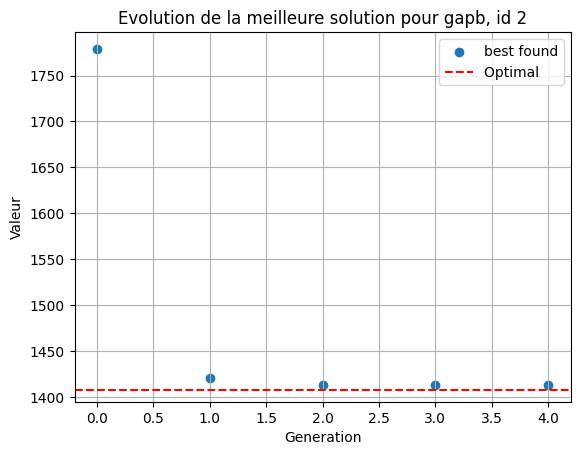

In [ ]:
import csv
import matplotlib.pyplot as plt

# Load optimal values from the new `val_opt.csv` format
optimal_values = {}  # Dictionary to store optimal values by (instance, ID)
with open("val_opt.csv", mode="r") as file:
    reader = csv.DictReader(file)
    
    for row in reader:
        instance_id = (row['instance'], row['id'])  # Key by (instance, id)
        optimal_values[instance_id] = int(row['val'])  # Store the optimal value as an integer

# Specify the instance and run ID you want to focus on
target_instance = "gapb"  # Replace with your desired instance name
target_run_id = "1"  # Replace with the desired run ID

# Load the results from the `optimal_evaluations_min.csv` file and perform the analysis
with open("resultats_T/optimal_evaluations_min.csv", mode="r") as file:
    reader = csv.reader(file)
    header = next(reader)  # Skip the header
    
    for row in reader:
        instance_name = row[0]  # Instance name (e.g., gap1)
        run_id = str(int(row[1]) - 1)  # Run ID (adjusted by -1 to match the format)
        
        # Filter by the target instance and run ID
        if instance_name != target_instance or run_id != target_run_id:
            continue
        
        # Convert generation values to floats
        gen_values = [float(val) for val in row[2:-4] if val]
        
        # Get the optimal value for the instance and run ID
        optimal_value = optimal_values.get((instance_name, run_id), None)
        
        if optimal_value is not None and gen_values:
            # Plot the evolution of the best solution for this instance and run
            plt.scatter(range(len(gen_values)),gen_values, label=f"best found")
            plt.axhline(y=optimal_value, color='r', linestyle='--', label=f"Optimal ")

# Customize the plot
plt.title(f"Evolution de la meilleure solution pour {target_instance}, id {target_run_id}")
plt.xlabel("Generation")
plt.ylabel("Valeur")
#plt.yscale('log')
plt.legend(loc='best')
plt.grid(True)
plt.show()
